In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1- Compréhension et inspection initiale des données

In [2]:
# Load the csv file
df = pd.read_csv('StudentsPerformance.csv')

# Display all rows
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
# Diplay the 5 first rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Display the 5 last rows
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
# Display the dimensions of the dataset
df.shape

(1000, 8)

In [6]:
# General Informations of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data Cleaning

In [7]:
# Check the missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# Descriptives statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# Check the types of data
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
# Verification of duplicated rows
df.duplicated().sum()

np.int64(0)

In [11]:
# Deleting of duplicated rows
df = df.drop_duplicates()

In [12]:
# List of column names
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
# Check minimum values of scores
df[['math score','reading score', 'writing score']].min()


math score        0
reading score    17
writing score    10
dtype: int64

In [14]:
# Check maximum values of scores
df[['math score','reading score', 'writing score']].max()

math score       100
reading score    100
writing score    100
dtype: int64

## 3- Exploratory Data Analysis 

In [15]:
# Mean of scores in Math, writing and reading
df[['math score','reading score', 'writing score']].mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [16]:
# Mean by gender
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [17]:
# Mean by types of lunch 
df.groupby("lunch")[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [18]:
# Mean by ethnicity
df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()


,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [19]:
# Mean of scores by parental level education
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [20]:
# Median of scores
df[['math score','reading score', 'writing score']].median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

In [21]:
# Standard déviation of scores
df[['math score','reading score', 'writing score']].std()

math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64

## 4- Creation of new Analytical Metrics

In [22]:
# Mean score by student
df['average_score'] = df[['math score','reading score', 'writing score']].mean(axis=1 )

In [23]:
df.shape

(1000, 9)

In [24]:
# Score total par étudiant
df['total_score'] = df[['math score','reading score', 'writing score']].sum(axis=1 )

In [25]:
df.shape

(1000, 10)

## 5- Visualisation

<Axes: ylabel='count'>

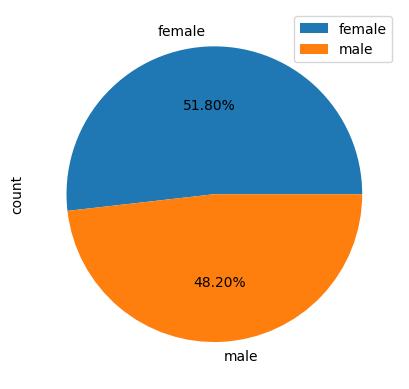

In [26]:
# Gender repartition
(df['gender'].value_counts().plot(kind='pie', autopct='%2.2f%%', legend=True))


#### Interprétation:Répartition équilibrée, permettant des comparaisons justes. Les filles excellent en lecture/écriture, les garçons en maths.

<Axes: title={'center': 'Number of students by Lunch type'}, xlabel='lunch'>

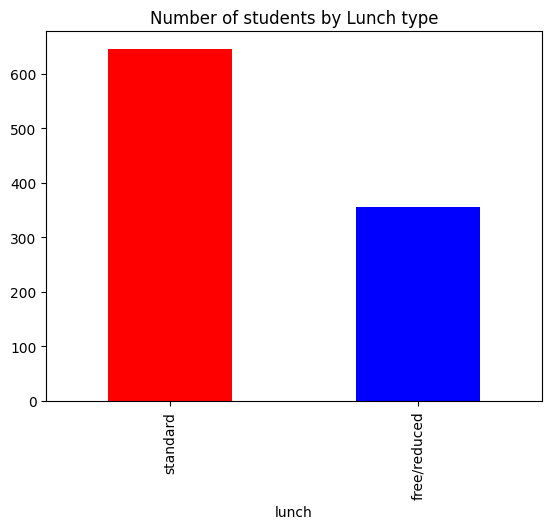

In [32]:
# Bar chart lunch
colors = ['red','blue']
df['lunch'].value_counts().plot(kind='bar' , color= colors, title='Number of students by Lunch type' )


#### Interprétation : Majorité avec repas standard, indiquant des conditions stables, mais 35% défavorisés

<Axes: title={'center': 'Distribution of average score of students'}, ylabel='Density'>

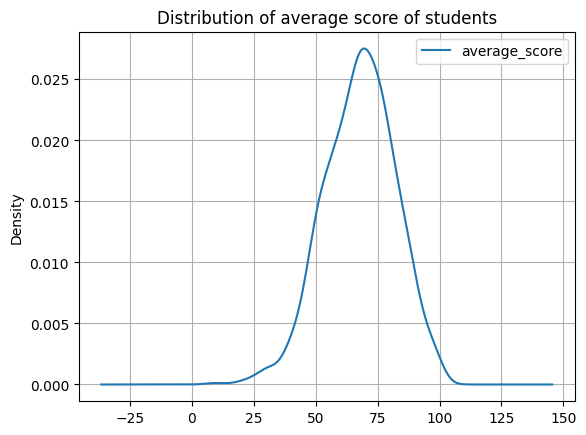

In [33]:
# Curve for the average of scores
df['average_score'].plot(kind='kde',legend=True, title='Distribution of average score of students', grid=True)

#### Interprétation : Distribution normale avec asymétrie vers les faibles scores, révélant des inégalités.

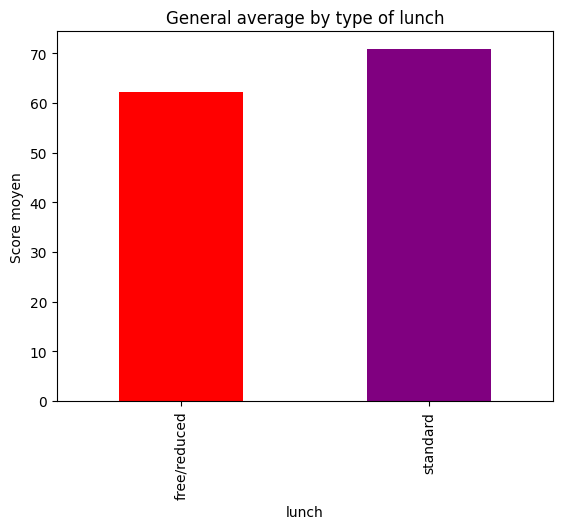

In [29]:
# General average by type of lunch
colors = ['red','purple']
df.groupby("lunch")["average_score"].mean().plot(kind="bar", color=colors) 
plt.title("General average by type of lunch") 
plt.ylabel("Score moyen") 
plt.show()

<Axes: title={'center': 'Average Scores by Test Preparation Course'}, xlabel='test preparation course'>

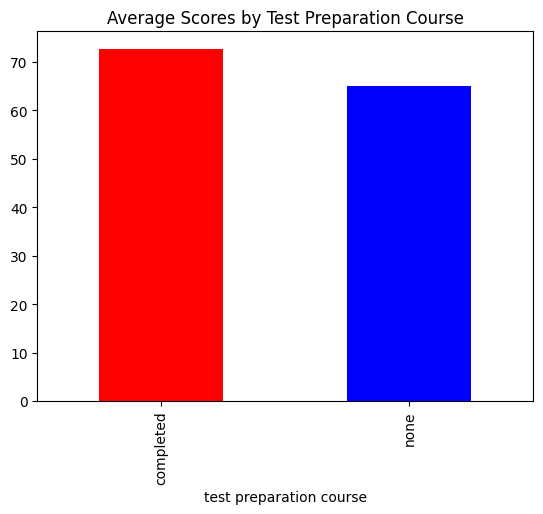

In [30]:
# Average Scores by Test Preparation Course
df.groupby('test preparation course')['average_score'].mean().plot(kind='bar', color=['red', 'blue'], title='Average Scores by Test Preparation Course')

#### Contribution of total scores by parental level of education

<Axes: title={'center': 'Contribution of total scores by parental level of education'}, ylabel='total_score'>

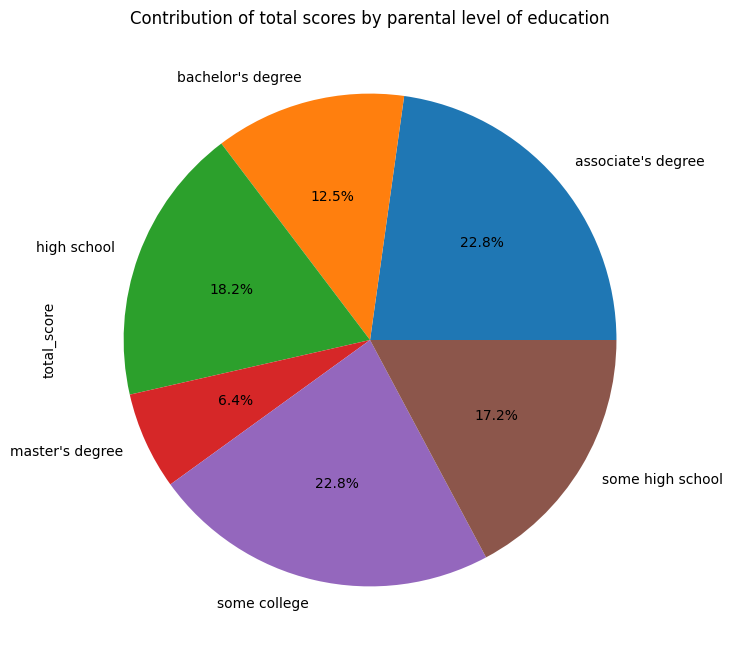

In [31]:
df.groupby('parental level of education')['total_score'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Contribution of total scores by parental level of education')